In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

In [41]:
data_df = pd.read_csv("od_transfer_no_weird_data.csv", delimiter = ',')
peak_hour_list = list(range(15,20))+ list(range(5,9))
weekend = ['Sunday','Saturday']
data_df['peak_hour'] = pd.to_datetime(pd.Series(data_df.Transfer_boarding_datetime)).dt.hour.isin(peak_hour_list)
data_df['weekday'] = 1-pd.to_datetime(pd.Series(data_df.Transfer_boarding_datetime)).dt.weekday_name.isin(weekend)
data_df['peak_hour'].describe()

feature_list = ['Headway','transfer_duration_seconds', 'Walking_time', 'value']
X_df = data_df.loc[:, feature_list]
X = X_df.as_matrix()


/Users/Wenonah/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [103]:
# Sum of distances of samples to their closest cluster center.
# Initialize k-means
k_means = KMeans(n_clusters= 5, init='random')
# Fit the k-means by passing it the input
k_means.fit(X)
# Retrieve labels (cluster ids) for all the inputs
output_labels = k_means.labels_

print (k_means.inertia_)

1.0015791901e+12


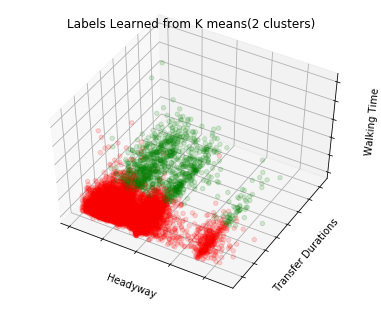

In [102]:
n_samples = X_df.shape[0]
sample_size = 10000
# rand = np.random.choice(n_samples, sample_size, replace = False)
random_sample = X[rand]
labels_selected = output_labels[rand]

# random_sample = X1
colors = ['red','green','blue','purple', 'black']
colors_1 = [colors[int(labels_selected[i])] for i in range(sample_size)]

fig = plt.figure(1, figsize=(5, 4))
plt.clf()
# 'elev' stores the elevation angle in the z plane
ax = Axes3D(fig, elev=50)
plt.cla() #clear axes
ax.scatter(random_sample[:, 0], random_sample[:, 1], random_sample[:, 2], c=colors_1,alpha =0.15)# Plotting just three columns, because we can't plot 4!
ax.w_xaxis.set_ticklabels([]) # Removes markings along the axes
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Headyway')
ax.set_ylabel('Transfer Durations')
ax.set_zlabel('Walking Time')
ax.set_title('Labels Learned from K means(2 clusters)')
plt.savefig("k_means_2_clusters.png", bbox_inches='tight')
plt.show()

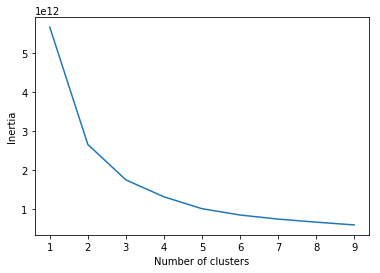

In [58]:
# Number of clusters v/s inertia
plt.clf()
n_list = np.arange(1,10,1)
inertia = []
for n in n_list: 
    k_means = KMeans(n_clusters=n) 
    k_means.fit(X)
    inertia.append(k_means.inertia_)
plt.plot(n_list, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()